# MA Model Code Example : Time Series Talk

https://www.youtube.com/watch?v=uBYOJfwQeME

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def plot_acf_pacf(heater_series, lags=20, figsize=(12, 5)):
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    # Plot ACF on the first subplot
    plot_acf(heater_series, lags=lags, ax=ax1)
    ax1.set_title('Autocorrelation Function (ACF)')

    # Plot PACF on the second subplot
    plot_pacf(heater_series, lags=lags, ax=ax2)
    ax2.set_title('Partial Autocorrelation Function (PACF)')

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Display the plots
    plt.show()

# Generate Some Data

# $y_t = 50 + 0.4\varepsilon_{t-1} + 0.3\varepsilon_{t-2} + \varepsilon_t$
# $\varepsilon_t \sim N(0,1)$

In [3]:
errors = np.random.normal(0, 1, 400)

In [4]:
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')

In [5]:
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

In [6]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

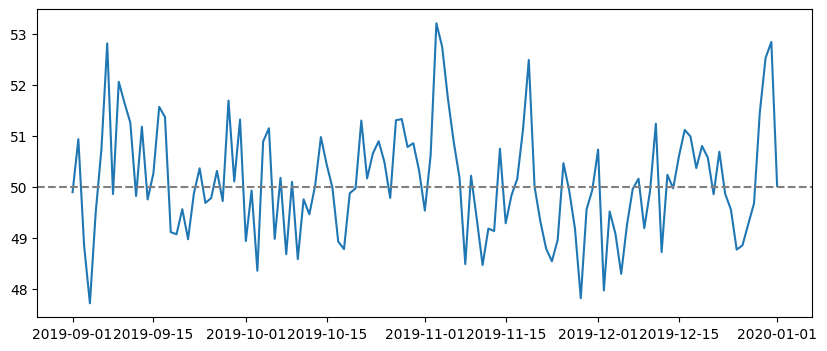

In [7]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

In [8]:
def calc_corr(series, lag):
    return pearsonr(series[:-lag], series[lag:])[0]

# ACF

<BarContainer object of 10 artists>

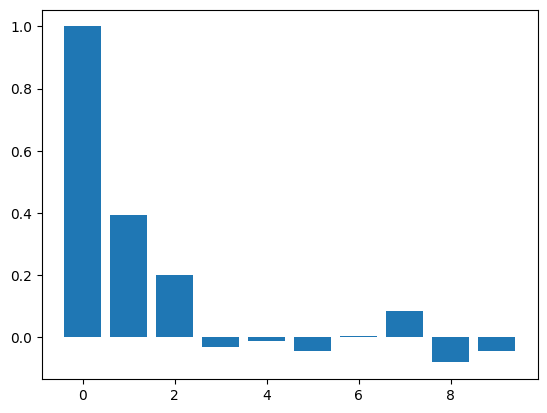

In [9]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])

# PACF

<BarContainer object of 21 artists>

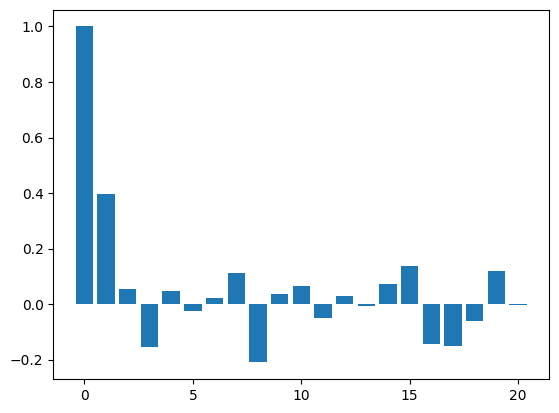

In [10]:
pacf_vals = pacf(series)
num_lags = 21
plt.bar(range(num_lags), pacf_vals[:num_lags])

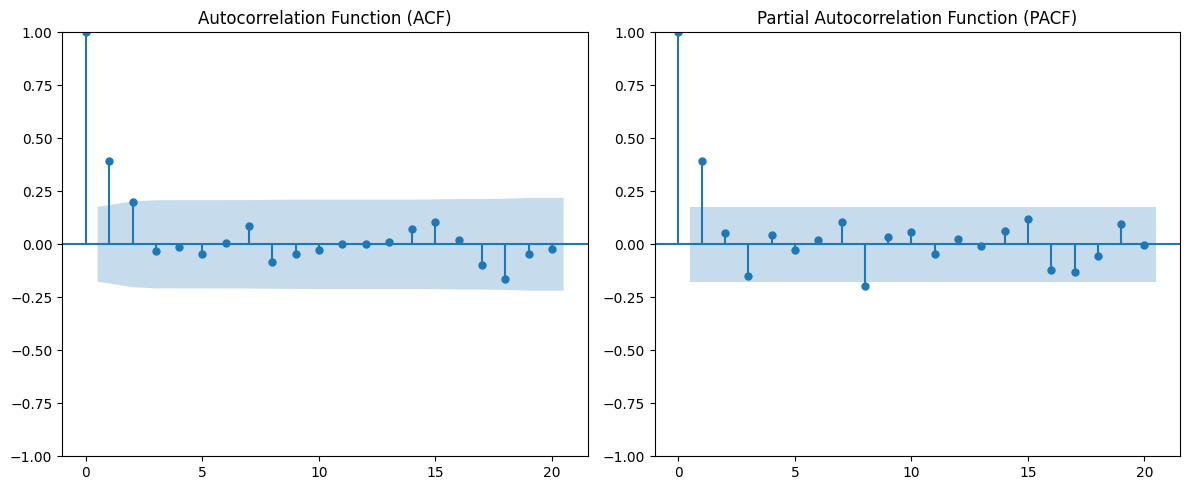

In [11]:
plot_acf_pacf(series)

# Get training and testing sets

In [12]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

# Fit ARIMA Model

In [13]:
#create the model
model = ARIMA(train_data, order=(0,0,2))

In [14]:
#fit the model
model_fit = model.fit()

In [15]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -169.341
Date:                Fri, 12 Sep 2025   AIC                            346.682
Time:                        16:07:24   BIC                            357.865
Sample:                    09-01-2019   HQIC                           351.224
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0901      0.149    337.223      0.000      49.799      50.381
ma.L1          0.3810      0.090      4.221      0.000       0.204       0.558
ma.L2          0.2356      0.094      2.516      0.0

# Predicted Model:
# $\hat{y}_t = 50 + 0.37\varepsilon_{t-1} + 0.25\varepsilon_{t-2}$

In [16]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [17]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [18]:
residuals = test_data - predictions

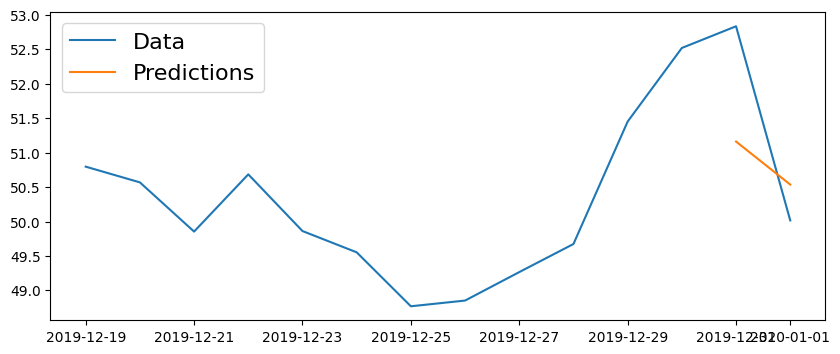

In [19]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [20]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.021


In [21]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 1.2395158107087507
